<a href="https://colab.research.google.com/github/panghanwu/neural_network_python/blob/main/im2col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# im2col algorithm

||
---|:-:
Image size | $I_{w} \times I_{h}$
Filter size | $F_{w} \times F_{h}$
Feature map size | $O_{w} \times O_{h}$
Batch size | $B$
Channel number | $C$
Filter number | $M$
Padding | $D$
Stride | $S$

$O = \dfrac{I-F+2D}{S} + 1$  

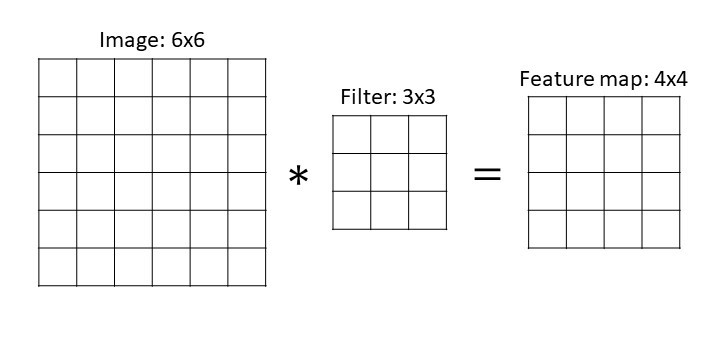


## Transform convolution into a matrix operation.  
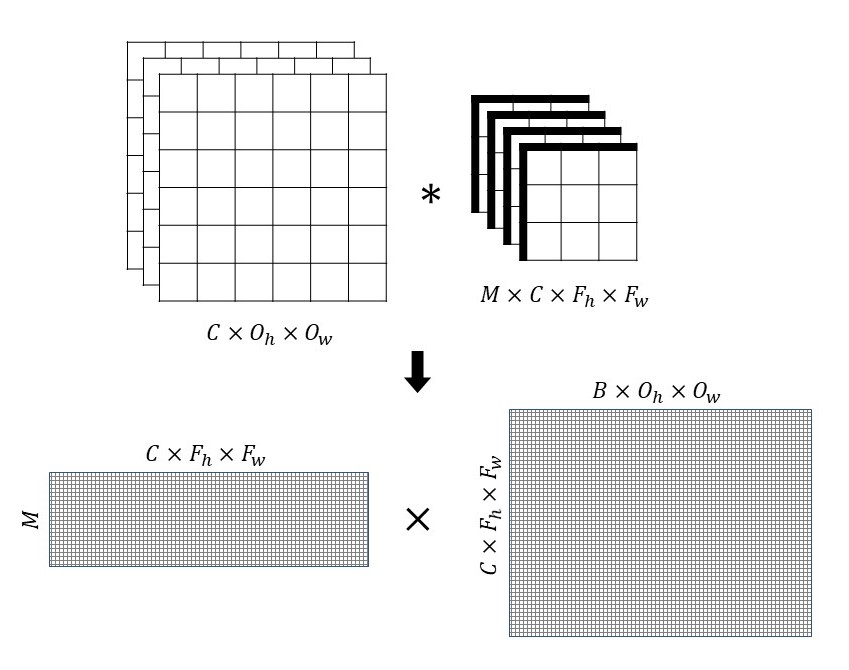

## Algorithm
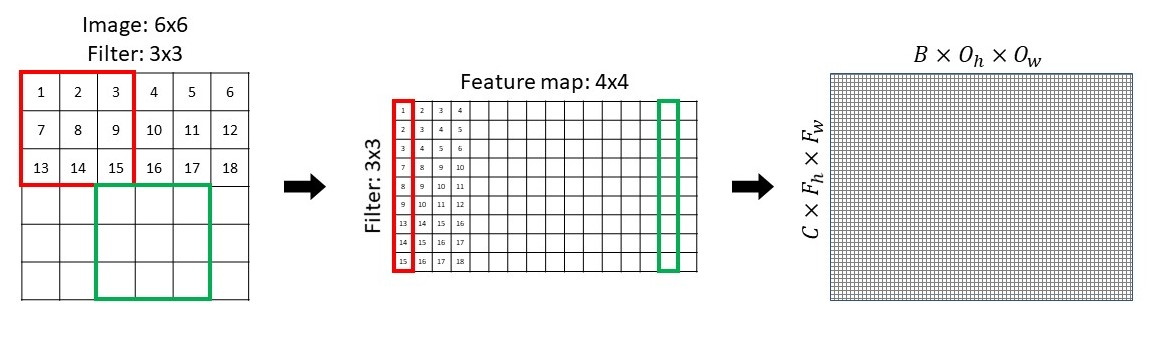

In [1]:
import numpy as np

"""padding"""
a = np.array([[1,1,1],
        [1,1,1],
        [1,1,1]])

np.pad(a, [(1,2), (3,1)], 'constant')

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [2]:
"""stride"""
b = np.arange(20)
b[0:5:2]

array([0, 2, 4])

In [3]:
"""im2col"""
# image -> (batch:1, channel:1, height:8, width:8)
imgs = np.arange(64).reshape(1,1,8,8)
imgs

array([[[[ 0,  1,  2,  3,  4,  5,  6,  7],
         [ 8,  9, 10, 11, 12, 13, 14, 15],
         [16, 17, 18, 19, 20, 21, 22, 23],
         [24, 25, 26, 27, 28, 29, 30, 31],
         [32, 33, 34, 35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44, 45, 46, 47],
         [48, 49, 50, 51, 52, 53, 54, 55],
         [56, 57, 58, 59, 60, 61, 62, 63]]]])

In [4]:
n_bt, n_ch, img_h, img_w = imgs.shape
fh = 3  # height of filter
fw = 3  # width of filter
pad = 1  # padding
stride = 1 
oh = (img_h - fh + 2*pad) // stride + 1  # height of output feature map
ow = (img_w - fw + 2*pad) // stride + 1  # width of output feature map

# padding
img_pad = np.pad(imgs, [(0,0),(0,0),(pad,pad),(pad,pad)], 'constant')
img_pad

array([[[[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  1,  2,  3,  4,  5,  6,  7,  0],
         [ 0,  8,  9, 10, 11, 12, 13, 14, 15,  0],
         [ 0, 16, 17, 18, 19, 20, 21, 22, 23,  0],
         [ 0, 24, 25, 26, 27, 28, 29, 30, 31,  0],
         [ 0, 32, 33, 34, 35, 36, 37, 38, 39,  0],
         [ 0, 40, 41, 42, 43, 44, 45, 46, 47,  0],
         [ 0, 48, 49, 50, 51, 52, 53, 54, 55,  0],
         [ 0, 56, 57, 58, 59, 60, 61, 62, 63,  0],
         [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]]]])

In [5]:
img_pad[:,:,0:8,0:8]

array([[[[ 0,  0,  0,  0,  0,  0,  0,  0],
         [ 0,  0,  1,  2,  3,  4,  5,  6],
         [ 0,  8,  9, 10, 11, 12, 13, 14],
         [ 0, 16, 17, 18, 19, 20, 21, 22],
         [ 0, 24, 25, 26, 27, 28, 29, 30],
         [ 0, 32, 33, 34, 35, 36, 37, 38],
         [ 0, 40, 41, 42, 43, 44, 45, 46],
         [ 0, 48, 49, 50, 51, 52, 53, 54]]]])

In [6]:
# create contain for each column
cols = np.zeros((n_bt, n_ch, fh, fw, oh, ow))
cols[:,:,0,0,:,:] 

array([[[[0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0.]]]])

In [7]:
for h in range(fh):
  h_lim = h + stride*oh
  for w in range(fw):
    w_lim = w + stride*ow
    cols[:,:,h,w,:,:] = img_pad[:,:,h:h_lim:stride,w:w_lim:stride]
cols

array([[[[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
           [ 0.,  8.,  9., 10., 11., 12., 13., 14.],
           [ 0., 16., 17., 18., 19., 20., 21., 22.],
           [ 0., 24., 25., 26., 27., 28., 29., 30.],
           [ 0., 32., 33., 34., 35., 36., 37., 38.],
           [ 0., 40., 41., 42., 43., 44., 45., 46.],
           [ 0., 48., 49., 50., 51., 52., 53., 54.]],

          [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
           [ 8.,  9., 10., 11., 12., 13., 14., 15.],
           [16., 17., 18., 19., 20., 21., 22., 23.],
           [24., 25., 26., 27., 28., 29., 30., 31.],
           [32., 33., 34., 35., 36., 37., 38., 39.],
           [40., 41., 42., 43., 44., 45., 46., 47.],
           [48., 49., 50., 51., 52., 53., 54., 55.]],

          [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
           [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  0.],
           [ 9., 10., 11., 12., 13., 14., 

In [8]:
cols.transpose(1,2,3,0,4,5).reshape(n_ch*fh*fw, n_bt*oh*ow)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,
         4.,  5.,  6.,  0.,  8.,  9., 10., 11., 12., 13., 14.,  0., 16.,
        17., 18., 19., 20., 21., 22.,  0., 24., 25., 26., 27., 28., 29.,
        30.,  0., 32., 33., 34., 35., 36., 37., 38.,  0., 40., 41., 42.,
        43., 44., 45., 46.,  0., 48., 49., 50., 51., 52., 53., 54.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,
         5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
        18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  0.,  9., 10., 11., 12., 13., 14., 15.,  0., 17., 18.,
        19., 20., 21., 22., 23.,  0., 25., 26., 27., 28., 29., 30., 31.,
         0., 33., 34., 35., 36., 37., 38., 39.,  0., 41., 4

## Filter case
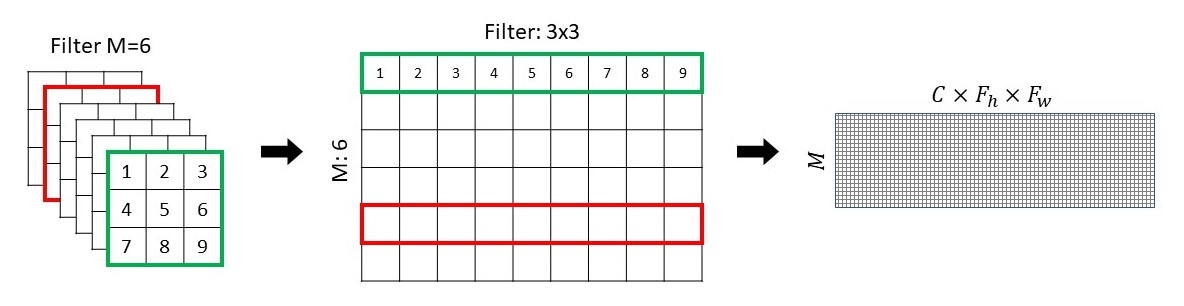

In [9]:
"""im2col for filter"""
# filter -> (M:1, channel:1, height:3, width:3)
flt = np.arange(9).reshape(1,1,3,3)
flt

array([[[[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]]])

In [10]:
m, n_ch, flt_h, flt_w = flt.shape
flt.reshape(m, n_ch*flt_h*flt_w)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

# col2im Algorithm
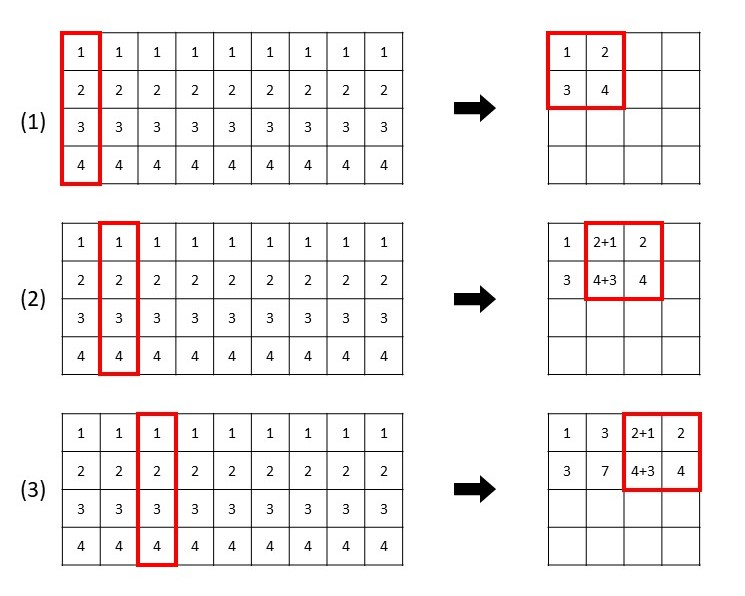

In [11]:
# cols = np.arange(36).reshape(4,9)
cols = np.ones(36).reshape(4,9)
cols

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [12]:
fh = 2  # height of filter
fw = 2  # width of filter
pad = 0  # padding
stride = 1 
n_bt = 1 # batch size of original images
n_ch = 1  # channel of original images
img_h = 4  # height of original images
img_w = 4  # width of original images
oh = (img_h - fh + 2*pad) // stride + 1  # height of output feature map
ow = (img_w - fw + 2*pad) // stride + 1  # width of output feature map

cols = cols.reshape(n_ch, fh, fw, n_bt, oh, ow).transpose(3,0,1,2,4,5)
cols[:,:,0,0,:,:]

array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [13]:
images = np.zeros((n_bt, n_ch, img_h+2*pad+stride-1, img_w+2*pad+stride-1))
images[:,:,0:3:stride,0:3:stride]

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

In [14]:
for h in range(fh):
  h_lim = h + stride*oh
  for w in range(fw):
    w_lim = w + stride*ow
    images[:,:,h:h_lim:stride,w:w_lim:stride] += cols[:,:,h,w,:,:]
images[:, :, pad:img_h+pad, pad:img_w+pad]

array([[[[1., 2., 2., 1.],
         [2., 4., 4., 2.],
         [2., 4., 4., 2.],
         [1., 2., 2., 1.]]]])

## **[Note]** col2im is NOT inverse operation to im2col!